<a href="https://colab.research.google.com/github/Priyanshu7tiwary/ML/blob/main/passingnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplsoccer
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.6 MB/s eta 0:00:00


In [3]:
from mplsoccer.pitch import Pitch, VerticalPitch
!pip install statsbombpy mplsoccer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.3 MB/s eta 0:00:00


In [4]:
from statsbombpy import sb


In [5]:
matches = sb.matches(competition_id=11, season_id=1)  # Example: La Liga 2018/19

# Find a specific match (e.g., Real Madrid vs Barcelona)
match_id = matches[(matches['home_team'] == 'Real Madrid') & (matches['away_team'] == 'Barcelona')].iloc[0]['match_id']
events = sb.events(match_id=match_id)
subs = events[events['type'] == 'Substitution']
subs.to_csv('match_subs.csv', index=False)
passes = events[events['type'] == 'Pass']
passes.to_csv('match_passes.csv', index=False)
print(subs.head())

     bad_behaviour_card ball_receipt_outcome ball_recovery_recovery_failure  \
4091                NaN                  NaN                            NaN   
4092                NaN                  NaN                            NaN   
4093                NaN                  NaN                            NaN   
4094                NaN                  NaN                            NaN   
4095                NaN                  NaN                            NaN   

     block_offensive carry_end_location clearance_aerial_won  \
4091             NaN                NaN                  NaN   
4092             NaN                NaN                  NaN   
4093             NaN                NaN                  NaN   
4094             NaN                NaN                  NaN   
4095             NaN                NaN                  NaN   

     clearance_body_part clearance_head clearance_left_foot  \
4091                 NaN            NaN                 NaN   
4092          

In [6]:
passes = pd.read_csv('match_passes.csv')

In [7]:
selected_columns = ['location', 'pass_end_location', 'pass_recipient_id','player_id','timestamp']
df=passes[selected_columns]
df.head()


,location,pass_end_location,pass_recipient_id,player_id,timestamp
0,"[61.0, 41.0]","[47.0, 38.0]",5203.0,5246.0,00:00:00.600
1,"[47.0, 40.0]","[33.0, 51.0]",5213.0,5203.0,00:00:02.600
2,"[33.0, 47.0]","[34.0, 35.0]",6332.0,5213.0,00:00:05.040
3,"[35.0, 26.0]","[35.0, 11.0]",5211.0,6332.0,00:00:07.000
4,"[32.0, 12.0]","[39.0, 20.0]",5203.0,5211.0,00:00:09.080


In [8]:
df.shape

(1092, 5)

In [47]:
df.head()

,location,pass_end_location,pass_recipient_id,player_id,timestamp
0,"[61.0, 41.0]","[47.0, 38.0]",5203.0,5246.0,00:00:00.600
1,"[47.0, 40.0]","[33.0, 51.0]",5213.0,5203.0,00:00:02.600
2,"[33.0, 47.0]","[34.0, 35.0]",6332.0,5213.0,00:00:05.040
3,"[35.0, 26.0]","[35.0, 11.0]",5211.0,6332.0,00:00:07.000
4,"[32.0, 12.0]","[39.0, 20.0]",5203.0,5211.0,00:00:09.080


K mean Clustering

In [48]:
end=df['pass_end_location']
end1=df['pass_end_location']

In [49]:
df1=df['location']
df2=df['location']

making start end dataset


In [52]:
import ast
import numpy as np

In [ ]:
df2 = df2.to_frame(name="start")

In [55]:
df2['start'] = df2['start'].apply(ast.literal_eval)

In [56]:
df2['x'] = df2['start'].apply(lambda point: point[0])
df2['y'] = df2['start'].apply(lambda point: point[1])

end_points

In [60]:
end1 = end1.to_frame(name="end")

In [62]:
end1['end'] = end1['end'].apply(ast.literal_eval)

In [63]:
end1['end_x'] = end1['end'].apply(lambda point: point[0])
end1['end_y'] = end1['end'].apply(lambda point: point[1])

checking data

In [75]:
print(end1.head())
print(df2.head())
print(df2.shape)
print(end1.shape)
print(end1.dtypes)
print(df2.dtypes)

            end  end_x  end_y
0  [47.0, 38.0]   47.0   38.0
1  [33.0, 51.0]   33.0   51.0
2  [34.0, 35.0]   34.0   35.0
3  [35.0, 11.0]   35.0   11.0
4  [39.0, 20.0]   39.0   20.0
          start     x     y
0  [61.0, 41.0]  61.0  41.0
1  [47.0, 40.0]  47.0  40.0
2  [33.0, 47.0]  33.0  47.0
3  [35.0, 26.0]  35.0  26.0
4  [32.0, 12.0]  32.0  12.0
(1092, 3)
(1092, 3)
end       object
end_x    float64
end_y    float64
dtype: object
start     object
x        float64
y        float64
dtype: object


making a combined dataset


In [73]:
combined_df = pd.DataFrame()
combined_df['start_x'] = df2['x']
combined_df['start_y'] = df2['y']
combined_df['end_x'] = end1['end_x']
combined_df['end_y'] = end1['end_y']


In [76]:
combined_df.head()

,start_x,start_y,end_x,end_y
0,61.0,41.0,47.0,38.0
1,47.0,40.0,33.0,51.0
2,33.0,47.0,34.0,35.0
3,35.0,26.0,35.0,11.0
4,32.0,12.0,39.0,20.0


In [20]:

df_concat_rows = pd.concat([df1, end], axis=0, ignore_index=True)
df_concat_rows.head()

,0
0,"[61.0, 41.0]"
1,"[47.0, 40.0]"
2,"[33.0, 47.0]"
3,"[35.0, 26.0]"
4,"[32.0, 12.0]"


In [21]:
df_concat_rows = df_concat_rows.to_frame(name="pos")


In [16]:
df_concat_rows

,0
0,"[61.0, 41.0]"
1,"[47.0, 40.0]"
2,"[33.0, 47.0]"
3,"[35.0, 26.0]"
4,"[32.0, 12.0]"
...,...
2179,"[91.0, 67.0]"
2180,"[99.0, 79.0]"
2181,"[89.0, 66.0]"
2182,"[113.0, 68.0]"


In [25]:
df_concat_rows['pos'] = df_concat_rows['pos'].apply(ast.literal_eval)

In [28]:

df_concat_rows['x'] = df_concat_rows['pos'].apply(lambda point: point[0])
df_concat_rows['y'] = df_concat_rows['pos'].apply(lambda point: point[1])

In [29]:
df_concat_rows.head()

,pos,x,y
0,"[61.0, 41.0]",61.0,41.0
1,"[47.0, 40.0]",47.0,40.0
2,"[33.0, 47.0]",33.0,47.0
3,"[35.0, 26.0]",35.0,26.0
4,"[32.0, 12.0]",32.0,12.0


In [30]:
X = np.column_stack((df_concat_rows['x'], df_concat_rows['y']))

In [31]:
print(X)

[[ 61.  41.]
 [ 47.  40.]
 [ 33.  47.]
 ...
 [ 89.  66.]
 [113.  68.]
 [104.  44.]]


In [32]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=10)  # Adjust n_components as needed
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)
print("Cluster labels:", labels)

Cluster labels: [0 0 2 ... 3 3 9]


visualization


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Football Pitch

In [43]:
def plot_pitch():
    fig, ax = plt.subplots(figsize=(12, 7))
    w=83

    # Outer boundary
    ax.plot([0, 0], [0, w], color="black", lw=2)  # Left boundary
    ax.plot([0, 140], [w, w], color="black", lw=2)  # Top boundary
    ax.plot([140, 140], [w, 0], color="black", lw=2)  # Right boundary
    ax.plot([140, 0], [0, 0], color="black", lw=2)  # Bottom boundary

    # Halfway line
    ax.plot([70, 70], [0, w], color="black", lw=2)

    # Center circle
    center_circle = plt.Circle((70, 42.5), 9.15, color='black', fill=False, lw=2)
    ax.add_patch(center_circle)

    ax.set_xlim(0, 140)
    ax.set_ylim(0, w)
    ax.set_aspect('equal')
    return ax


Clustering

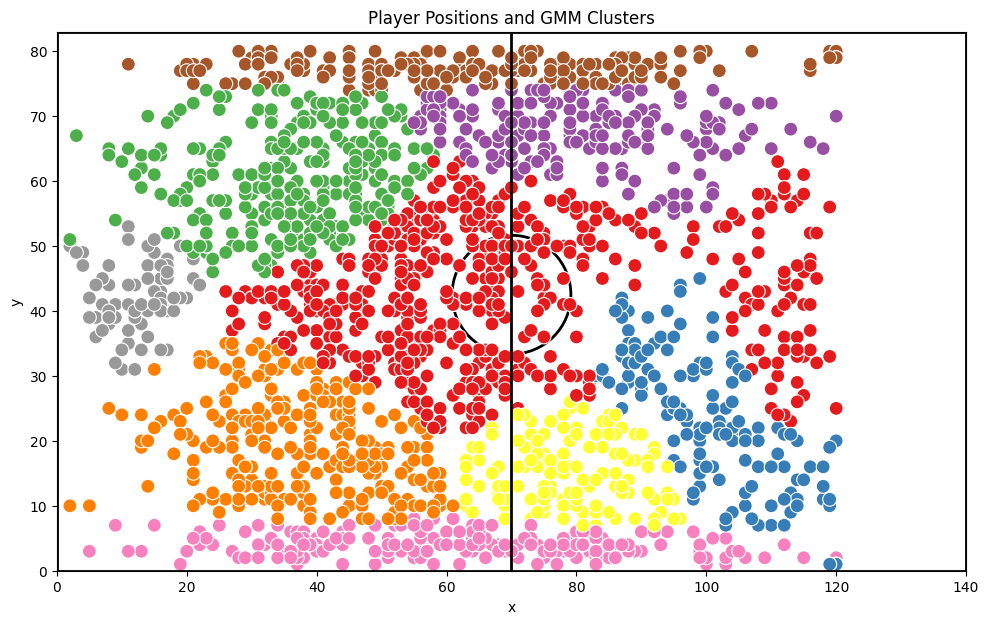

In [44]:
kmeans = KMeans(n_clusters=10, random_state=42)  # Set the number of clusters (n_clusters)
kmeans.fit(X)


labels = gmm.predict(X)


df_concat_rows['cluster'] = labels


ax = plot_pitch()


sns.scatterplot(data=df_concat_rows, x='x', y='y', hue='cluster', palette='Set1', ax=ax, s=100, legend=None)
plt.title('Player Positions and GMM Clusters')
plt.show()

Cluster centres

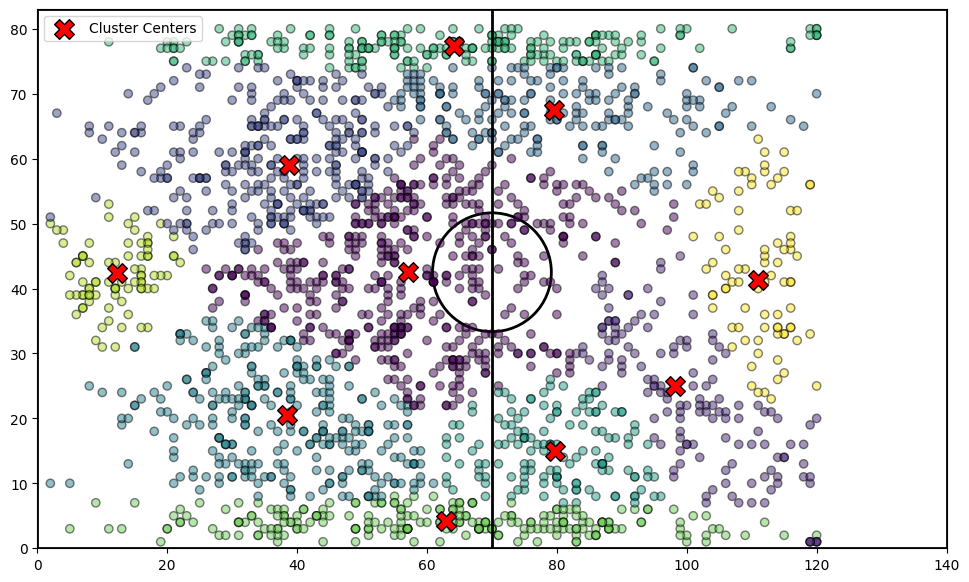

In [46]:
cluster_centers = kmeans.cluster_centers_

def plot_clusters(X, labels, cluster_centers):
    ax = plot_pitch()

    # Scatter plot for passes (each point belongs to a cluster)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors="k")

    # Scatter plot for cluster centers (highlighted in red)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, edgecolors="black", label="Cluster Centers")

    plt.legend()
    plt.show()

# Call the function
plot_clusters(X, labels, gmm.means_)  # Use gmm.means_ if using GMM


Predicting and assinging passes to clusters

In [77]:
combined_df['start_cluster'] = kmeans.predict(combined_df[['start_x', 'start_y']])
combined_df['end_cluster'] = kmeans.predict(combined_df[['end_x', 'end_y']])


In [78]:
combined_df.head()

,start_x,start_y,end_x,end_y,start_cluster,end_cluster
0,61.0,41.0,47.0,38.0,5,6
1,47.0,40.0,33.0,51.0,6,3
2,33.0,47.0,34.0,35.0,7,6
3,35.0,26.0,35.0,11.0,0,0
4,32.0,12.0,39.0,20.0,0,0


edges


In [79]:



weighted_edges = combined_df.groupby(['start_cluster', 'end_cluster']).size().reset_index(name='weight')

print(weighted_edges.head())  # See the weighted connections


   start_cluster  end_cluster  weight
0              0            0      69
1              0            1       1
2              0            2       1
3              0            3       4
4              0            4      24


network

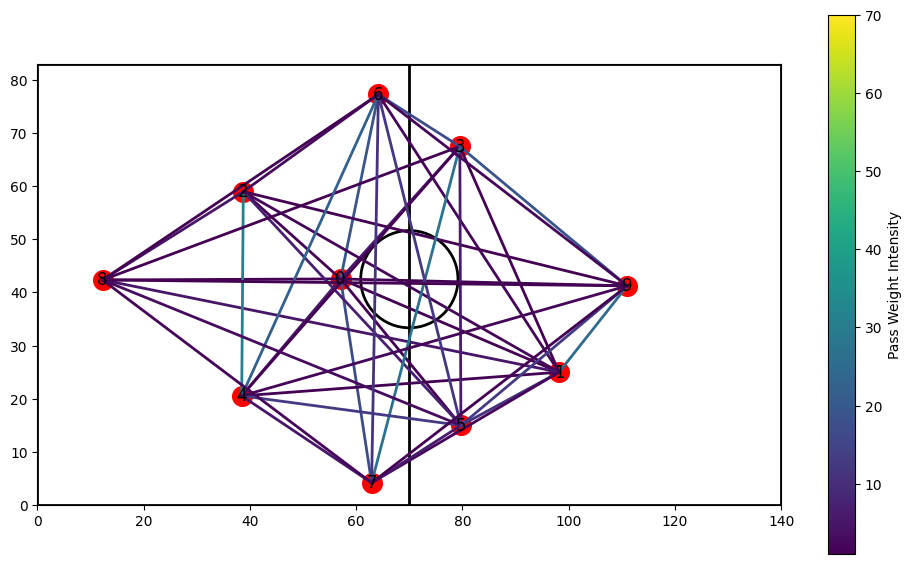

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


G = nx.Graph()


for index, row in weighted_edges.iterrows():
    G.add_edge(row['start_cluster'], row['end_cluster'], weight=row['weight'])


cluster_centers = gmm.means_


ax = plot_pitch()


for i, (x, y) in enumerate(cluster_centers):
    plt.scatter(x, y, color='red', s=200)
    plt.text(x, y, str(i), fontsize=12, color='black', ha='center', va='center')

# Normalize the edge weights for color intensity
weights = [edge[2]['weight'] for edge in G.edges(data=True)]
norm = plt.Normalize(vmin=min(weights), vmax=max(weights))  # Normalize based on weight range
cmap = plt.cm.viridis  # You can choose other color maps (e.g., 'plasma', 'inferno')

# Create the weighted edges with color intensity
for edge in G.edges(data=True):
    start, end, weight = edge
    x_start, y_start = cluster_centers[start]
    x_end, y_end = cluster_centers[end]

    # Plot the edge with color intensity based on the weight
    color = cmap(norm(weight['weight']))  # Apply color map based on weight intensity
    plt.plot([x_start, x_end], [y_start, y_end], 'k-', lw=2, color=color)  # Thicker edge for better visibility

# Add a colorbar to indicate the weight intensity
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for colorbar
plt.colorbar(sm, ax=ax, label='Pass Weight Intensity')

plt.show()
